# Case Ton - Lucas D Ribeiro


## Importando as bibliotecas e bases de dados



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set_style('darkgrid')
from matplotlib.colors import DivergingNorm

In [2]:
cases = pd.read_csv("cases.csv")
creds = pd.read_csv("creds.csv")
cases.drop(columns = "Id", inplace = True)

## Explorando os dados

In [3]:
#Checando o tipo do canal de comunicação
cases['channelid'].describe()

count    77489.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0
Name: channelid, dtype: float64

In [4]:
#Excluindo a coluna Unnamed
cases.drop(columns = "Unnamed: 0", inplace = True)

In [5]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126989 entries, 0 to 126988
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountid                 77489 non-null  object 
 1   date_ref                  77489 non-null  object 
 2   channelid                 77489 non-null  float64
 3   waitingtime               77489 non-null  float64
 4   missed                    77489 non-null  object 
 5   pesquisa_de_satisfa_o__c  11585 non-null  object 
 6   assunto                   77489 non-null  object 
dtypes: float64(2), object(5)
memory usage: 6.8+ MB


In [6]:
creds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126989 entries, 0 to 126988
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              126989 non-null  int64 
 1   cred_date               126989 non-null  object
 2   shipping_address_city   126989 non-null  object
 3   shipping_address_state  126989 non-null  object
 4   max_machine             126989 non-null  object
 5   accountid               77489 non-null   object
dtypes: int64(1), object(5)
memory usage: 5.8+ MB


In [7]:
# Excluindo a coluna Unnamed
creds.drop(columns = "Unnamed: 0", inplace = True)

In [8]:
# Visualizando os tipos dos assuntos
agrupado = cases.groupby(['assunto']).size()

In [9]:
agrupado

assunto
::                                                          106
Aplicativo::                                                  4
Aplicativo:Cartões:                                           1
Aplicativo:Cartões:Ativação                                 865
Aplicativo:Cartões:Falha na ativação                        104
                                                           ... 
Transferência de saldo:Cartão:Problema                        1
Transferência de saldo:Conta bancária:                       35
Transferência de saldo:Conta bancária:Problema             2870
Transferência de saldo:Transferência Terceiros:Dúvidas        4
Transferência de saldo:Transferência Terceiros:Problema       8
Length: 221, dtype: int64

### Separando os textos na coluna de assuntos em assunto principal e subtipo

In [10]:
cases['subtipo'] = cases['assunto'].str.split(':').str[-1]

In [11]:
cases['assunto'] = cases['assunto'].str.split(':').str[0]

In [12]:
cases['assunto'] = cases['assunto'] .astype(str)
cases.groupby(['assunto']).size()


assunto
                            106
Aplicativo                20507
Bandeira                   1061
Bandeiras                   230
Cadastro                   6310
Comunicados                  21
Feedback do cliente        1205
Incidente                   486
Logística                 15583
Outros                     1056
Pedido                     3266
Produto                   22182
Risco                       162
Telecom                      36
Transação                  2265
Transferência de saldo     3013
nan                       49500
dtype: int64

In [13]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126989 entries, 0 to 126988
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountid                 77489 non-null   object 
 1   date_ref                  77489 non-null   object 
 2   channelid                 77489 non-null   float64
 3   waitingtime               77489 non-null   float64
 4   missed                    77489 non-null   object 
 5   pesquisa_de_satisfa_o__c  11585 non-null   object 
 6   assunto                   126989 non-null  object 
 7   subtipo                   77489 non-null   object 
dtypes: float64(2), object(6)
memory usage: 7.8+ MB


In [14]:
cases

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,subtipo
0,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso
...,...,...,...,...,...,...,...,...
126984,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo,Prazos e taxas
126985,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto,Ativação
126986,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro,Dúvidas
126987,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto,Dúvidas


### Excluindo linhas em branco

In [15]:
cases.isnull().sum()

accountid                    49500
date_ref                     49500
channelid                    49500
waitingtime                  49500
missed                       49500
pesquisa_de_satisfa_o__c    115404
assunto                          0
subtipo                      49500
dtype: int64

In [16]:
cases.shape

(126989, 8)

In [17]:
cases.dropna(subset=['accountid'], inplace=True)
cases.shape

(77489, 8)

In [18]:
creds.isnull().sum()

cred_date                     0
shipping_address_city         0
shipping_address_state        0
max_machine                   0
accountid                 49500
dtype: int64

In [19]:
creds.dropna(subset=['accountid'], inplace=True)

In [20]:
creds.isnull().sum()

cred_date                 0
shipping_address_city     0
shipping_address_state    0
max_machine               0
accountid                 0
dtype: int64

In [21]:
creds.shape

(77489, 5)

## Criando a tabela principal, juntando as duas tabelas disponíveis (Creds e Cases)

In [22]:

tabela_completa = pd.merge(cases, creds, on ='accountid')

In [23]:
tabela_completa.describe()

,channelid,waitingtime
count,326955.0,326955.000000
mean,2.0,17.293080
std,0.0,70.309443
min,2.0,0.000000
25%,2.0,6.000000
50%,2.0,9.000000
75%,2.0,14.000000
max,2.0,7993.000000


In [24]:
tabela_completa['cred_date'].describe()

count         326955
unique           441
top       2020-07-07
freq            4979
Name: cred_date, dtype: object

In [25]:
tabela_completa['date_ref'].describe()

count         326955
unique           245
top       2020-09-10
freq            3806
Name: date_ref, dtype: object

In [26]:
tabela_completa['date_ref'] = pd.to_datetime(tabela_completa['date_ref'], errors='coerce') 
tabela_completa['cred_date'] = pd.to_datetime(tabela_completa['date_ref'], errors='cred_date')

In [27]:
tabela_completa

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,subtipo,cred_date,shipping_address_city,shipping_address_state,max_machine
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3
1,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3
2,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3
3,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,Ativação,2020-07-31,São Gonçalo,RJ,T3
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,Ativação,2020-07-31,São Gonçalo,RJ,T3
...,...,...,...,...,...,...,...,...,...,...,...,...
326950,0013j00002yi49FAAQ,2020-09-29,2.0,3.0,False,NaN,Logística,,2020-09-29,Petrópolis,RJ,T2
326951,0013j00002yi49FAAQ,2020-09-29,2.0,3.0,False,NaN,Logística,,2020-09-29,Petrópolis,RJ,T2
326952,0013j00002yi49FAAQ,2020-09-29,2.0,3.0,False,NaN,Logística,,2020-09-29,Petrópolis,RJ,T2
326953,0013j00002yi49FAAQ,2020-09-29,2.0,3.0,False,NaN,Logística,,2020-09-29,Petrópolis,RJ,T2


### Questão 1


#### Separando os dados pelo perído proposto na atividade e pelo tipo do sistema (novo ou antigo)

In [28]:
tabela_completa["cred_impl"] = np.where(tabela_completa['cred_date'] > '2020-07-01', 'Novo', 'Antigo')
tabela_completa["date_ref_impl"] = np.where(tabela_completa['date_ref'] > '2020-07-01', 'Novo', 'Antigo')

In [29]:
tabela_completa['cred_Mes'] = tabela_completa['cred_date'].dt.strftime('%m')
tabela_completa['date_ref_Mes'] = tabela_completa['date_ref'].dt.strftime('%m')


In [30]:
print(tabela_completa.groupby(['cred_impl']).size())

cred_impl
Antigo     69777
Novo      257178
dtype: int64


In [31]:
# Excluindo valores duplicados
tabela_completa.duplicated().sum()

249632

In [32]:
tabela_completa = tabela_completa.drop_duplicates()

In [33]:
#Tipos de assuntos 
tabela_completa.groupby(['assunto']).size()

assunto
                            106
Aplicativo                20480
Bandeira                   1061
Bandeiras                   230
Cadastro                   6310
Comunicados                  21
Feedback do cliente        1205
Incidente                   486
Logística                 15552
Outros                     1056
Pedido                     3250
Produto                   22100
Risco                       162
Telecom                      36
Transação                  2257
Transferência de saldo     3011
dtype: int64

In [34]:
tabela_assunto_produto = tabela_completa.loc[tabela_completa["assunto"] == "Produto"]
tabela_assunto_produto = tabela_assunto_produto[["accountid","date_ref_Mes","date_ref_impl","channelid"]]


#### Criando tabela mes, tipo do sistema e tipo de contato = 2(telefone)

In [35]:
tabela_assunto_produto = tabela_assunto_produto.loc[tabela_assunto_produto["channelid"] == 2]
tabela_assunto_produto

,accountid,date_ref_Mes,date_ref_impl,channelid
3,0013j00002z0CeEAAU,07,Novo,2.0
6,0013j00002z0CeEAAU,09,Novo,2.0
17,0013j00002zQgldAAC,08,Novo,2.0
42,0013j00002yp2xzAAA,08,Novo,2.0
46,0013j00002yp2xzAAA,08,Novo,2.0
...,...,...,...,...
326900,0013j00002zfshHAAQ,09,Novo,2.0
326906,0013j00002yi49FAAQ,08,Novo,2.0
326913,0013j00002yi49FAAQ,08,Novo,2.0
326927,0013j00002yi49FAAQ,09,Novo,2.0


In [36]:
#Excluindo duplicados
tabela_assunto_produto = tabela_assunto_produto.drop_duplicates()

In [37]:
tabela_assunto_produto = tabela_assunto_produto [["date_ref_impl","date_ref_Mes","accountid"]]

In [38]:
tabela_assunto_produto

,date_ref_impl,date_ref_Mes,accountid
3,Novo,07,0013j00002z0CeEAAU
6,Novo,09,0013j00002z0CeEAAU
17,Novo,08,0013j00002zQgldAAC
42,Novo,08,0013j00002yp2xzAAA
62,Novo,08,0013j00002ykv22AAA
...,...,...,...
326833,Novo,07,0013j00002teCDNAA2
326856,Novo,08,0013j00002z1gZ4AAI
326882,Novo,09,0013j00002zfshHAAQ
326906,Novo,08,0013j00002yi49FAAQ


In [39]:
# Agrupando tipo do sistema com o mês referente e quantidade de chamadas
check_implementacao = tabela_assunto_produto.groupby(by = ["date_ref_impl","date_ref_Mes"],as_index=False).count()



In [40]:
check_implementacao = pd.DataFrame(check_implementacao)

check_implementacao 

,date_ref_impl,date_ref_Mes,accountid
0,Antigo,02,27
1,Antigo,03,176
2,Antigo,04,377
3,Antigo,05,873
4,Antigo,06,1900
5,Antigo,07,159
6,Novo,07,3438
7,Novo,08,3470
8,Novo,09,3944
9,Novo,10,3508


In [41]:
#Renomeando as colunas
check_implementacao = check_implementacao.rename(columns = {'date_ref_impl':'sistema', 'date_ref_Mes' : 'mes', 'accountid':'quantidade'})
check_implementacao.sort_values(by='mes')

,sistema,mes,quantidade
0,Antigo,02,27
1,Antigo,03,176
2,Antigo,04,377
3,Antigo,05,873
4,Antigo,06,1900
5,Antigo,07,159
6,Novo,07,3438
7,Novo,08,3470
8,Novo,09,3944
9,Novo,10,3508


In [42]:
check_implementacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sistema     10 non-null     object
 1   mes         10 non-null     object
 2   quantidade  10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [43]:
# Transformando o mes de String para Inteiro
check_implementacao['mes']= check_implementacao['mes'].astype(str).astype(int)

#### Criando a tabela do sistema antigo x novo

Text(0.5, 1.0, 'Sistema Novo x Antigo')

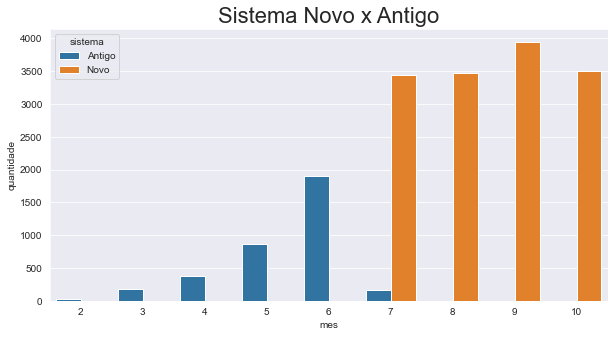

In [45]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="mes", y = "quantidade", data=check_implementacao, hue = 'sistema')
ax.set_title('Sistema Novo x Antigo', fontsize = 22)



#### Calculando a variação entre meses

In [46]:
check_implementacao_var = check_implementacao[["mes","quantidade"]]
check_implementacao_var = check_implementacao_var.sort_values(by = "mes")

check_implementacao_var['variacao'] = check_implementacao_var.quantidade.pct_change()
check_implementacao_var['variacao'] = check_implementacao_var['variacao']*100


In [47]:
#Tabela de variação de ligações entre meses
check_implementacao_var

,mes,quantidade,variacao
0,2,27,NaN
1,3,176,551.851852
2,4,377,114.204545
3,5,873,131.564987
4,6,1900,117.640321
5,7,159,-91.631579
6,7,3438,2062.264151
7,8,3470,0.930774
8,9,3944,13.659942
9,10,3508,-11.054767


# Questão 2

In [48]:
tabela_completa

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,subtipo,cred_date,shipping_address_city,shipping_address_state,max_machine,cred_impl,date_ref_impl,cred_Mes,date_ref_Mes
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07
3,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,Ativação,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto,Dúvidas,2020-09-23,São Gonçalo,RJ,T3,Novo,Novo,09,09
9,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística,Tracking,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08
13,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido,Outros,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326920,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo,Prazos e taxas,2020-08-26,Petrópolis,RJ,T2,Novo,Novo,08,08
326927,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto,Ativação,2020-09-09,Petrópolis,RJ,T2,Novo,Novo,09,09
326934,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09
326941,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09


### Criando tabela que traga volume, assunto, data de credenciamento e data do contato

In [49]:
tabela_novos_clientes = tabela_completa[["accountid","assunto","cred_Mes", "date_ref_Mes"]]
tabela_novos_clientes.head(10)

,accountid,assunto,cred_Mes,date_ref_Mes
0,0013j00002z0CeEAAU,Aplicativo,07,07
3,0013j00002z0CeEAAU,Produto,07,07
6,0013j00002z0CeEAAU,Produto,09,09
9,0013j00002zQgldAAC,Logística,08,08
13,0013j00002zQgldAAC,Pedido,08,08
17,0013j00002zQgldAAC,Produto,08,08
21,0013j00002zQgldAAC,Aplicativo,09,09
25,0013j0000304oN9AAI,Aplicativo,10,10
27,0013j0000304oN9AAI,Logística,10,10
29,0013j00002yzpxZAAQ,Aplicativo,08,08


In [50]:
tabela_novos_clientes.describe()

,accountid,assunto,cred_Mes,date_ref_Mes
count,77323,77323,77323,77323
unique,31429,16,9,9
top,0011L00002WeMWyQAN,Produto,09,09
freq,53,22100,17342,17342


In [51]:
#Removendo as duplicadas
tabela_novos_clientes = tabela_novos_clientes.drop_duplicates()

In [52]:
tabela_novos_clientes.describe()

,accountid,assunto,cred_Mes,date_ref_Mes
count,64522,64522,64522,64522
unique,31429,16,9,9
top,0011L00002WeMWyQAN,Produto,09,09
freq,22,17830,14520,14520


In [53]:
#Agrupando os dados por mes de credenciamento
grupo_novos_clientes = tabela_novos_clientes[["accountid","cred_Mes"]].copy()
grupo_novos_clientes = grupo_novos_clientes.groupby(by =["cred_Mes"],as_index=False).count()
grupo_novos_clientes = grupo_novos_clientes.rename(columns = {"cred_Mes":"mes", "accountid":"quantidade"})





### Tabela  e Gráfico de crescimento de clientes por mês

In [109]:
grupo_novos_clientes['variacao'] = grupo_novos_clientes.quantidade.pct_change()
grupo_novos_clientes['variacao'] = round(grupo_novos_clientes['variacao']*100)
...


Ellipsis

In [110]:
grupo_novos_clientes

,mes,quantidade,variacao
0,02,87,NaN
1,03,611,602.0
2,04,1491,144.0
3,05,3372,126.0
4,06,7159,112.0
5,07,12377,73.0
6,08,11917,-4.0
7,09,14520,22.0
8,10,12988,-11.0


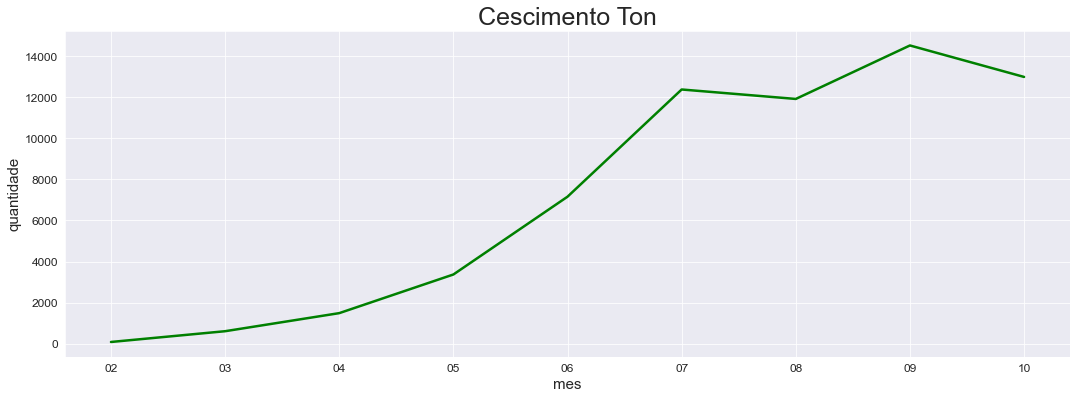

In [56]:
plt.subplots(figsize=(18, 6))
crescimento= sns.lineplot(data=grupo_novos_clientes, x="mes", y="quantidade", color = "green", linewidth=2.5)
crescimento.axes.set_title("Cescimento Ton",fontsize=25)
crescimento.set_xlabel("mes",fontsize=15)
crescimento.set_ylabel("quantidade",fontsize=15)
crescimento.tick_params(labelsize=12)
plt.show()

#### Criando um filtro onde as datas de credenciamento é igual a data de contato

In [57]:
novos_clientes_chamadas_recente = tabela_novos_clientes.loc[tabela_novos_clientes['cred_Mes'] == tabela_novos_clientes['date_ref_Mes']]

In [58]:
# Clientes novos tendem a entrar em contato logo que se credenciam na Ton
tabela_novos_clientes.loc[tabela_novos_clientes['cred_Mes'] != tabela_novos_clientes['date_ref_Mes']]

,accountid,assunto,cred_Mes,date_ref_Mes


In [59]:
novos_clientes_chamadas_recente

,accountid,assunto,cred_Mes,date_ref_Mes
0,0013j00002z0CeEAAU,Aplicativo,07,07
3,0013j00002z0CeEAAU,Produto,07,07
6,0013j00002z0CeEAAU,Produto,09,09
9,0013j00002zQgldAAC,Logística,08,08
13,0013j00002zQgldAAC,Pedido,08,08
...,...,...,...,...
326906,0013j00002yi49FAAQ,Produto,08,08
326920,0013j00002yi49FAAQ,Aplicativo,08,08
326927,0013j00002yi49FAAQ,Produto,09,09
326934,0013j00002yi49FAAQ,Cadastro,09,09


In [60]:
#Tipos de assuntos
novos_clientes_chamadas_recente["assunto"].unique()

array(['Aplicativo', 'Produto', 'Logística', 'Pedido', 'Risco',
       'Transação', 'Transferência de saldo', 'Cadastro', 'Bandeiras',
       'Bandeira', 'Feedback do cliente', 'Outros', 'Telecom',
       'Incidente', '', 'Comunicados'], dtype=object)

### Tabela de volume de ligações no mesmo mês do credenciamento do cliente por assunto

In [61]:

grupo_novos_clientes_chamadas_recente = novos_clientes_chamadas_recente[["accountid","assunto","cred_Mes"]]
novos_clientes_chamadas_recente['cred_Mes']= novos_clientes_chamadas_recente['cred_Mes'].astype(str).astype(int)
grupo_novos_clientes_chamadas_recente = novos_clientes_chamadas_recente.groupby(by =["assunto"],as_index=False).count()
grupo_novos_clientes_chamadas_recente = grupo_novos_clientes_chamadas_recente[["assunto","accountid"]]

In [62]:
grupo_novos_clientes_chamadas_recente = grupo_novos_clientes_chamadas_recente.sort_values(by="accountid", ascending = False)
grupo_novos_clientes_chamadas_recente

,assunto,accountid
11,Produto,17830
1,Aplicativo,15821
8,Logística,12975
4,Cadastro,5498
10,Pedido,3127
15,Transferência de saldo,2880
14,Transação,2149
6,Feedback do cliente,1149
9,Outros,1040
2,Bandeira,1024


In [63]:
grupo_novos_clientes_chamadas_recente = grupo_novos_clientes_chamadas_recente.rename(columns={"assunto":"Assunto","accountid":"Quantidade"})
grupo_novos_clientes_chamadas_recente.style.hide_index()

Assunto,Quantidade
Produto,17830
Aplicativo,15821
Logística,12975
Cadastro,5498
Pedido,3127
Transferência de saldo,2880
Transação,2149
Feedback do cliente,1149
Outros,1040
Bandeira,1024


# Questão 3

### Criando uma tabela que traga a informação necessária por data(semana)

In [64]:
tabela_completa

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,subtipo,cred_date,shipping_address_city,shipping_address_state,max_machine,cred_impl,date_ref_impl,cred_Mes,date_ref_Mes
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07
3,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,Ativação,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto,Dúvidas,2020-09-23,São Gonçalo,RJ,T3,Novo,Novo,09,09
9,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística,Tracking,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08
13,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido,Outros,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326920,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo,Prazos e taxas,2020-08-26,Petrópolis,RJ,T2,Novo,Novo,08,08
326927,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto,Ativação,2020-09-09,Petrópolis,RJ,T2,Novo,Novo,09,09
326934,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09
326941,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09


In [65]:
tabela_completa["date_ref"]

0        2020-07-31
3        2020-07-31
6        2020-09-23
9        2020-08-29
13       2020-08-29
            ...    
326920   2020-08-26
326927   2020-09-09
326934   2020-09-21
326941   2020-09-21
326948   2020-09-29
Name: date_ref, Length: 77323, dtype: datetime64[ns]

In [66]:
#adicionando uma coluna semana para cada linha de data do Dataframe
tabela_completa['semana'] = tabela_completa["date_ref"].dt.strftime('%U')

<ipython-input-66-96de631f1e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_completa['semana'] = tabela_completa["date_ref"].dt.strftime('%U')


In [67]:
tabela_completa

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,subtipo,cred_date,shipping_address_city,shipping_address_state,max_machine,cred_impl,date_ref_impl,cred_Mes,date_ref_Mes,semana
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07,30
3,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,Ativação,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07,30
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto,Dúvidas,2020-09-23,São Gonçalo,RJ,T3,Novo,Novo,09,09,38
9,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística,Tracking,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08,34
13,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido,Outros,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326920,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo,Prazos e taxas,2020-08-26,Petrópolis,RJ,T2,Novo,Novo,08,08,34
326927,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto,Ativação,2020-09-09,Petrópolis,RJ,T2,Novo,Novo,09,09,36
326934,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09,38
326941,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09,38


In [68]:
#Criando a tabela para análise
atendimento_prioridade = tabela_completa[["accountid","waitingtime","assunto","subtipo","date_ref_Mes","semana" ]].copy()

In [69]:
#Transformando o mês e semana em inteiros
atendimento_prioridade["date_ref_Mes"]= atendimento_prioridade["date_ref_Mes"].astype(str).astype(int)
atendimento_prioridade["semana"]= atendimento_prioridade["semana"].astype(str).astype(int)
atendimento_prioridade["date_ref_Mes"].describe()

count    77323.000000
mean         7.905319
std          1.656215
min          2.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: date_ref_Mes, dtype: float64

In [70]:
# Filtrando os meses posteriores ao mes 8
atendimento_prioridade = atendimento_prioridade.loc[atendimento_prioridade["date_ref_Mes"] >8]
atendimento_prioridade

,accountid,waitingtime,assunto,subtipo,date_ref_Mes,semana
6,0013j00002z0CeEAAU,1.0,Produto,Dúvidas,9,38
21,0013j00002zQgldAAC,10.0,Aplicativo,Redefinição de senha,9,35
25,0013j0000304oN9AAI,4.0,Aplicativo,Prazos e taxas,10,39
27,0013j0000304oN9AAI,4.0,Logística,Confirmação/alteração de dados,10,39
31,0013j00002yzpxZAAQ,7.0,Risco,,9,35
...,...,...,...,...,...,...
326900,0013j00002zfshHAAQ,14.0,Produto,Falha de Conexão - revertido,9,39
326927,0013j00002yi49FAAQ,4.0,Produto,Ativação,9,36
326934,0013j00002yi49FAAQ,3.0,Cadastro,Dúvidas,9,38
326941,0013j00002yi49FAAQ,3.0,Produto,Dúvidas,9,38


In [71]:
atendimento_prioridade

,accountid,waitingtime,assunto,subtipo,date_ref_Mes,semana
6,0013j00002z0CeEAAU,1.0,Produto,Dúvidas,9,38
21,0013j00002zQgldAAC,10.0,Aplicativo,Redefinição de senha,9,35
25,0013j0000304oN9AAI,4.0,Aplicativo,Prazos e taxas,10,39
27,0013j0000304oN9AAI,4.0,Logística,Confirmação/alteração de dados,10,39
31,0013j00002yzpxZAAQ,7.0,Risco,,9,35
...,...,...,...,...,...,...
326900,0013j00002zfshHAAQ,14.0,Produto,Falha de Conexão - revertido,9,39
326927,0013j00002yi49FAAQ,4.0,Produto,Ativação,9,36
326934,0013j00002yi49FAAQ,3.0,Cadastro,Dúvidas,9,38
326941,0013j00002yi49FAAQ,3.0,Produto,Dúvidas,9,38


In [72]:
atendimento_prioridade[["assunto","subtipo"]].drop_duplicates()

,assunto,subtipo
6,Produto,Dúvidas
21,Aplicativo,Redefinição de senha
25,Aplicativo,Prazos e taxas
27,Logística,Confirmação/alteração de dados
31,Risco,
...,...,...
228542,Risco,Chargeback
237052,Feedback do cliente,Catálogo de Produtos
255654,Feedback do cliente,Brindes/Assessórios
264970,Feedback do cliente,URA


In [73]:
# Chacando os assuntos diponíveis
atendimento_prioridade["assunto"].unique()

array(['Produto', 'Aplicativo', 'Logística', 'Risco', 'Transação',
       'Transferência de saldo', 'Cadastro', 'Outros',
       'Feedback do cliente', 'Pedido', 'Bandeira', 'Incidente',
       'Telecom', 'Comunicados', ''], dtype=object)

#### Tabela com a média de tempo gasto em chamadas por assunto

In [74]:
grupo_atendimento_prioridade = atendimento_prioridade[["assunto","waitingtime"]].groupby(by =["assunto"],as_index=False).mean().sort_values(by='waitingtime', ascending = False)

In [75]:
grupo_atendimento_prioridade

,assunto,waitingtime
6,Incidente,19.302949
5,Feedback do cliente,17.233560
8,Outros,17.023936
7,Logística,13.711170
4,Comunicados,13.200000
0,,13.093750
1,Aplicativo,12.925741
9,Pedido,12.287889
3,Cadastro,11.761888
10,Produto,11.537229


#### Criando o multiplicador/variante para cada assunto

In [76]:
'''
Tipo          Multiplicador
outros        1
Incidente      2
Logística     1.5
Bandeiras   1,25    
Pedido        1,25
Risco           2
Feedback do cliente      1,5
Produto     2
Transferência de saldo  1.75
Aplicativo     1.5
Cadastro      1.5
Telecom     1,25
Transação     1,25
Bandeira     1,25
Comunicados  1,25    

'''
 

def f(df):
    if df['assunto'] == 'outros':
        val = 1.25
    elif df['assunto'] == 'Incidente':
        val = 2.0
    elif df['assunto'] == 'Logística':
        val = 1.5
    elif df['assunto'] == 'Bandeiras':
        val = 1.25
    elif df['assunto'] == 'Pedido':
        val = 1.25
    elif df['assunto'] == 'Risco':
        val = 2.0
    elif df['assunto'] == 'Feedback do cliente':
        val = 1.5
    elif df['assunto'] == 'Produto':
        val = 2.0
    elif df['assunto'] == 'Transferência de saldo':
        val = 1.75
    elif df['assunto'] == 'Aplicativo':
        val = 1.5
    elif df['assunto'] == 'Cadastro':
        val = 1.5
    elif df['assunto'] == 'Telecom':
        val = 1.25
    elif df['assunto'] == 'Transação':
        val = 1.25
    elif df['assunto'] == 'Comunicados':
        val = 1.25
    else:
        val = 1.25
    return val

In [77]:
grupo_atendimento_prioridade['Variante'] = grupo_atendimento_prioridade.apply(f, axis=1)
grupo_atendimento_prioridade['Variante'].describe()



count    15.000000
mean      1.500000
std       0.298807
min       1.250000
25%       1.250000
50%       1.500000
75%       1.625000
max       2.000000
Name: Variante, dtype: float64

### Tabela assunto, tempo gasto x variante

In [78]:
grupo_atendimento_prioridade

,assunto,waitingtime,Variante
6,Incidente,19.302949,2.00
5,Feedback do cliente,17.233560,1.50
8,Outros,17.023936,1.25
7,Logística,13.711170,1.50
4,Comunicados,13.200000,1.25
0,,13.093750,1.25
1,Aplicativo,12.925741,1.50
9,Pedido,12.287889,1.25
3,Cadastro,11.761888,1.50
10,Produto,11.537229,2.00


In [79]:
grupo_atendimento_prioridade["Metrica"] = grupo_atendimento_prioridade['waitingtime'] *grupo_atendimento_prioridade['Variante']


In [80]:
grupo_atendimento_prioridade

,assunto,waitingtime,Variante,Metrica
6,Incidente,19.302949,2.00,38.605898
5,Feedback do cliente,17.233560,1.50,25.850340
8,Outros,17.023936,1.25,21.279920
7,Logística,13.711170,1.50,20.566754
4,Comunicados,13.200000,1.25,16.500000
0,,13.093750,1.25,16.367188
1,Aplicativo,12.925741,1.50,19.388611
9,Pedido,12.287889,1.25,15.359862
3,Cadastro,11.761888,1.50,17.642833
10,Produto,11.537229,2.00,23.074457


In [81]:
grupo_atendimento_prioridade["Metrica"].describe()

count    15.000000
mean     19.585791
std       6.700540
min      10.486111
25%      15.863525
50%      19.069706
75%      22.039960
max      38.605898
Name: Metrica, dtype: float64

In [82]:
# Separanando a tabela em tres gupos
primeiro_grupo = np.quantile(grupo_atendimento_prioridade["Metrica"], 0.33)
segundo_grupo = np.quantile(grupo_atendimento_prioridade["Metrica"],0.66 )

In [83]:
# Separando os grupos
def cluster(df):
    if df['Metrica'] <= primeiro_grupo:
        val = 'moderada'
    elif df['Metrica'] > primeiro_grupo and df['Metrica'] <= segundo_grupo :
        val = 'alta'
    else:
        val = 'urgente'
    return val

In [84]:
grupo_atendimento_prioridade['Necessidade_de_atenção'] = grupo_atendimento_prioridade.apply(cluster, axis=1)

In [85]:
grupo_atendimento_prioridade

,assunto,waitingtime,Variante,Metrica,Necessidade_de_atenção
6,Incidente,19.302949,2.00,38.605898,urgente
5,Feedback do cliente,17.233560,1.50,25.850340,urgente
8,Outros,17.023936,1.25,21.279920,urgente
7,Logística,13.711170,1.50,20.566754,alta
4,Comunicados,13.200000,1.25,16.500000,alta
0,,13.093750,1.25,16.367188,moderada
1,Aplicativo,12.925741,1.50,19.388611,alta
9,Pedido,12.287889,1.25,15.359862,moderada
3,Cadastro,11.761888,1.50,17.642833,alta
10,Produto,11.537229,2.00,23.074457,urgente


## Questao 4

### Criando tabela (volume, assunto, data do contato e semana) após mês 8

In [86]:
atendimento_prioridade_clientes = tabela_completa[["accountid","assunto","date_ref_Mes","semana"]].copy()
atendimento_prioridade_clientes["date_ref_Mes"]= atendimento_prioridade_clientes["date_ref_Mes"].astype(str).astype(int)
atendimento_prioridade_clientes = atendimento_prioridade_clientes.loc[atendimento_prioridade_clientes["date_ref_Mes"] >8]
atendimento_prioridade_clientes

,accountid,assunto,date_ref_Mes,semana
6,0013j00002z0CeEAAU,Produto,9,38
21,0013j00002zQgldAAC,Aplicativo,9,35
25,0013j0000304oN9AAI,Aplicativo,10,39
27,0013j0000304oN9AAI,Logística,10,39
31,0013j00002yzpxZAAQ,Risco,9,35
...,...,...,...,...
326900,0013j00002zfshHAAQ,Produto,9,39
326927,0013j00002yi49FAAQ,Produto,9,36
326934,0013j00002yi49FAAQ,Cadastro,9,38
326941,0013j00002yi49FAAQ,Produto,9,38


In [87]:
# Tabela juntando duas tabelas grupo_atendimento_prioridade e atendimento_prioridade_clientes
query_semana = pd.merge(grupo_atendimento_prioridade[["assunto","Necessidade_de_atenção"]],atendimento_prioridade_clientes[["assunto","accountid","semana"]],on = 'assunto')
query_semana

,assunto,Necessidade_de_atenção,accountid,semana
0,Incidente,urgente,0013j00002siYiBAAU,36
1,Incidente,urgente,0013j00002u3eOUAAY,37
2,Incidente,urgente,0013j00002zPg3pAAC,41
3,Incidente,urgente,0013j00002ynkgYAAQ,36
4,Incidente,urgente,0013j00002sefjbAAA,36
...,...,...,...,...
32690,Telecom,moderada,0013j0000304EWXAA2,40
32691,Telecom,moderada,0013j00002uEH5AAAW,42
32692,Telecom,moderada,0013j00002zfs2dAAA,38
32693,Telecom,moderada,0013j00002tgjVkAAI,38


### Tabela com os grupos da questão 3 como os dados semanais dos últimos 3 meses

In [88]:
query_semana = query_semana.groupby(by =["semana","Necessidade_de_atenção"],as_index=False)["accountid"].count()
query_semana = pd.DataFrame(query_semana)
query_semana.rename(columns = {"accountid":"quantidade"}, inplace = True)
query_semana

,semana,Necessidade_de_atenção,quantidade
0,35,alta,1862
1,35,moderada,310
2,35,urgente,1036
3,36,alta,2253
4,36,moderada,331
5,36,urgente,1581
6,37,alta,2311
7,37,moderada,352
8,37,urgente,1177
9,38,alta,2421


### Gráfico com os grupos propostos na questão 3

<AxesSubplot:xlabel='semana', ylabel='quantidade'>

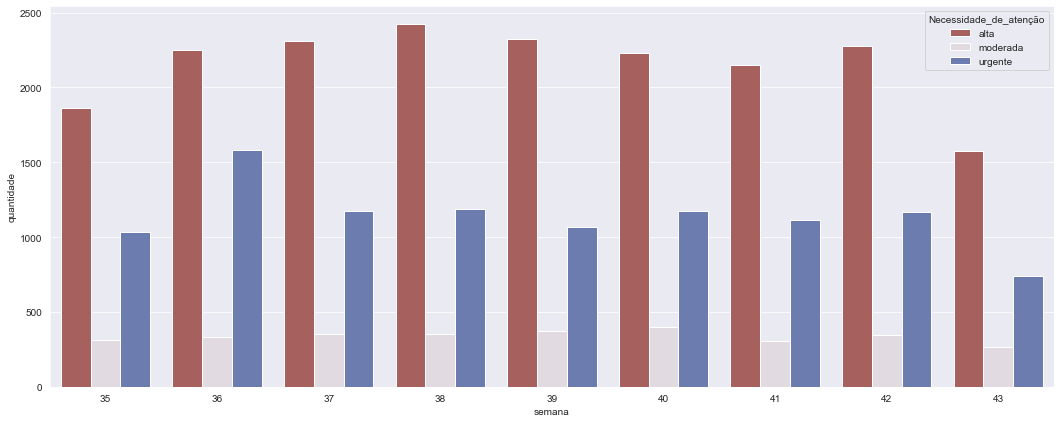

In [89]:
f, ax = plt.subplots(figsize=(18, 7))
#sns.set_style('whitegrid')
sns.barplot(x="semana", y = "quantidade", data=query_semana, hue = 'Necessidade_de_atenção', palette = 'twilight_shifted_r')



## Questao 5

### Construindo a tabela para os KPIs

In [90]:
tabela_completa

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,subtipo,cred_date,shipping_address_city,shipping_address_state,max_machine,cred_impl,date_ref_impl,cred_Mes,date_ref_Mes,semana
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Primeiro Acesso,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07,30
3,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,Ativação,2020-07-31,São Gonçalo,RJ,T3,Novo,Novo,07,07,30
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto,Dúvidas,2020-09-23,São Gonçalo,RJ,T3,Novo,Novo,09,09,38
9,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística,Tracking,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08,34
13,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido,Outros,2020-08-29,Itaboraí,RJ,T1,Novo,Novo,08,08,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326920,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo,Prazos e taxas,2020-08-26,Petrópolis,RJ,T2,Novo,Novo,08,08,34
326927,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto,Ativação,2020-09-09,Petrópolis,RJ,T2,Novo,Novo,09,09,36
326934,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09,38
326941,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto,Dúvidas,2020-09-21,Petrópolis,RJ,T2,Novo,Novo,09,09,38


In [91]:
# Utilizando o subtipo para construção dos KPIs
tabela_completa["subtipo"].unique()

array(['Primeiro Acesso', 'Ativação', 'Dúvidas', 'Tracking', 'Outros',
       'Redefinição de senha', 'Prazos e taxas',
       'Confirmação/alteração de dados', '', 'Saldo', 'Ineficiência',
       'Link de Pagamento', 'Dúvida D195', 'Problema Revertido',
       'Nome fantasia', 'Transferência bancária', 'Pinpad',
       'Tracking de OS', 'Falha no pareamento', 'Titularidade', 'S920',
       'Falha de Conexão - revertido', 'Renda Extra',
       'Bandeiras disponíveis', 'Pareamento', 'OS atrasada',
       'Disponíveis', 'Problema', 'Relatório', 'D195',
       'Falha de Conexão - não revertido', 'Cancelamento de Venda',
       'Telefone', 'Solicitação de Cartão', 'Dúvidas pinpad', 'E-mail',
       'Cadastro de conta bancária', 'Endereço', 'Encantador',
       'Dúvida S920', 'Problema na solicitação',
       'Transferência cartão pré-pago', 'Venda digitada', 'Prazos',
       'Falha de conexão - wifi - revertido', 'CNPJ X CPF',
       'Atendimento acesso', 'Calculadora de taxas', 'Mpos',
  

In [92]:
tabela_maquina_duvida = tabela_completa[['accountid','subtipo','max_machine']].copy()

### KPI 1:Tabela maquina modelo x volume

In [93]:
# Filtrando subtipo = Dúvidas
tabela_maquina_duvida = tabela_maquina_duvida.loc[tabela_maquina_duvida['subtipo'] == 'Dúvidas']
tabela_maquina_duvida_grupo = tabela_maquina_duvida.groupby(by = ["max_machine"],as_index=False).count()
tabela_maquina_duvida_grupo = tabela_maquina_duvida_grupo[['max_machine','accountid' ]]

In [94]:
tabela_maquina_duvida_grupo

,max_machine,accountid
0,NONE,34
1,T1,1897
2,T2,2384
3,T3,2035


In [95]:
tabela_maquina_duvida_grupo = tabela_maquina_duvida_grupo.loc[tabela_maquina_duvida_grupo['max_machine'] != 'NONE']

### Gráfico Pie com modelos maquinas x volume

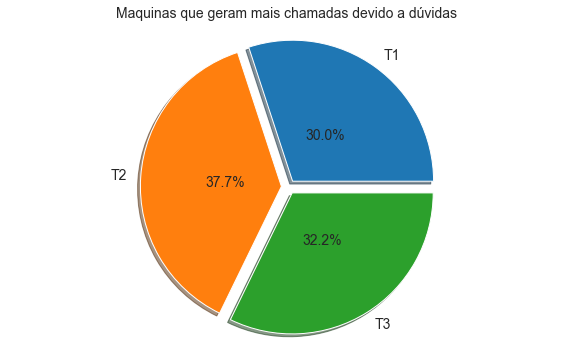

In [96]:
fig1, ax1 = plt.subplots(figsize=[10,6])
ax1.pie(tabela_maquina_duvida_grupo.accountid, labels=tabela_maquina_duvida_grupo.max_machine,explode=[0.05]*3, autopct='%1.1f%%',textprops={'fontsize': 14},pctdistance=0.4, shadow=True)
plt.title("Maquinas que geram mais chamadas devido a dúvidas", fontsize=14);
ax1.axis('equal')

plt.show()

### KPI 2: Chamadas sobre logística x Estados

In [97]:
tabela_maquina_logistica = tabela_completa[['accountid','assunto','shipping_address_state']].copy()


In [98]:
# Filtrando as informações
tabela_maquina_logistica = tabela_maquina_logistica.loc[tabela_maquina_logistica['assunto'] == 'Logística']
tabela_maquina_logistica



,accountid,assunto,shipping_address_state
9,0013j00002zQgldAAC,Logística,RJ
27,0013j0000304oN9AAI,Logística,SC
34,0013j00002zOcuAAAS,Logística,GO
36,0013j00002zOcuAAAS,Logística,GO
101,0013j00002ykXSEAA2,Logística,PB
...,...,...,...
326848,0013j0000303OJPAA2,Logística,GO
326852,0013j0000303OJPAA2,Logística,GO
326865,0013j00002ye8jtAAA,Logística,SE
326867,0013j00002ye8jtAAA,Logística,SE


In [99]:
#Agrupando as informações
tabela_maquina_logistica_grupo = tabela_maquina_logistica.groupby(by = ["shipping_address_state"],as_index=False).count()


In [100]:
tabela_maquina_logistica_grupo = tabela_maquina_logistica_grupo[['accountid','shipping_address_state']]


In [101]:
tabela_maquina_logistica_grupo = tabela_maquina_logistica_grupo.rename(columns = {"accountid": "logistica_clientes"})


In [102]:
# Volume de clientes por estado
clientes_por_estado =  tabela_completa[['accountid','shipping_address_state']].copy()
clientes_por_estado = clientes_por_estado.groupby(by = ["shipping_address_state"],as_index=False).count()

In [103]:
clientes_por_estado = clientes_por_estado.rename(columns = {"accountid":"total_clientes"})
clientes_por_estado

,shipping_address_state,total_clientes
0,AC,150
1,AL,864
2,AM,813
3,AP,373
4,BA,5136
5,CE,3432
6,DF,1597
7,ES,1548
8,GO,2665
9,MA,1228


In [104]:
#Juntando as duas informações
tabela_clientes_estado = pd.merge( tabela_maquina_logistica_grupo, clientes_por_estado, on ='shipping_address_state')
tabela_clientes_estado["pct_logistica_clientes"] = (tabela_clientes_estado['logistica_clientes']/tabela_clientes_estado['total_clientes'])*100

In [105]:
tabela_clientes_estado = tabela_clientes_estado[['shipping_address_state','pct_logistica_clientes']].sort_values(by = 'pct_logistica_clientes', ascending = False)

#### Gráfico chamadas por estados(clientes)

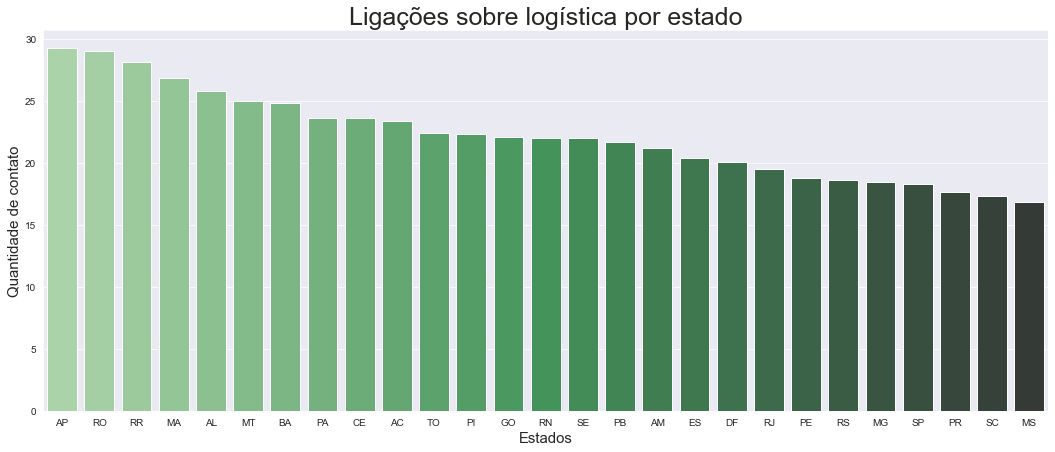

In [106]:
f, ax = plt.subplots(figsize=(18, 7))
sns.set_style('darkgrid')
pal = sns.color_palette("Greens_d", len(tabela_clientes_estado['pct_logistica_clientes']))
log_estado = sns.barplot(x="shipping_address_state", y = "pct_logistica_clientes", data= tabela_clientes_estado ,palette=pal)
log_estado.axes.set_title("Ligações sobre logística por estado",fontsize=25)
log_estado.set_xlabel("Estados",fontsize=15)
log_estado.set_ylabel("Quantidade de contato",fontsize=15)


plt.show()